# Fine-tuning the model for token classification 
***
#### We will be predicting 2 depolymerase folds : Beta-helix and 6
#### Here are the results for the models :
***
esm2_t6_8M_UR50D : {'eval_loss': 0.45753657817840576, <b>'eval_accuracy': 0.8439131075453115</b>, 'eval_runtime': 40.7606, 'eval_samples_per_second': 4.293, 'eval_steps_per_second': 0.54, 'epoch': 3.0}
esm2_t12_35M_UR50D : {'eval_loss': 0.35650020837783813, <b>'eval_accuracy': 0.9001007034209102</b>, 'eval_runtime': 83.4518, 'eval_samples_per_second': 2.097, 'eval_steps_per_second': 0.264, 'epoch': 3.0}
esm2_t30_150M_UR50D : {'eval_loss': 0.2777683734893799, <b>'eval_accuracy': 0.9233610987968299</b>, 'eval_runtime': 219.8341, 'eval_samples_per_second': 0.796, 'eval_steps_per_second': 0.1, 'epoch': 3.0}
***
#### Issue with the proteins that are full beta-helix !!!
Wait could be that it is working but that the graph code is wrong
#### The model model that work also for full beta-helix is esm2_t30_150M_UR50D checkpoint-192

***
#### Next step, generate another classical ML model to predict the probability of the protein actually carrying a depolymerase :
Generate a probability/ score based on :
1. Length of the largest consecutive positive token
2. Span of the first predicted amino acid (followed by two consecutive predictions) to the last predicted one 
3. Total number of predicted amino acid
4. Fraction of the total number of predicted amino acid within the largest consecutive positive token

In [22]:
import pandas as pd
import os 

path_work = "/media/concha-eloko/Linux/depolymerase_building"
#path_work = "/home/conchae/PhageDepo_pdb"


df_depo = pd.read_csv(f"{path_work}/Dpo_domains.phagedepo.0805.final.tsv" , sep = "\t" , header = 0)

In [3]:
df_depo["Fold"].unique()

array(['right-handed beta-helix', '6-bladed beta-propeller',
       'TIM beta/alpha-barrel', 'Other'], dtype=object)

In [23]:
df_beta_helix = df_depo[df_depo["Fold"] == "right-handed beta-helix"]
df_beta_prope = df_depo[df_depo["Fold"] == "6-bladed beta-propeller"]

In [24]:
df_beta_prope

,Seq_ID,Fold,Prob,Boundaries,Dpo_seq,Full_seq
10,phagedepo__3113,6-bladed beta-propeller,0.817,3113_A_3_291_575,VEPGVVTGFDVTTMPHALVRQPDGSFEFKTLDWSKRGAGNDDTNPM...,MPLITQSIKNLKGGISQQPDILRFSDQGEAQVNCWSSESDGLQKRP...
17,phagedepo__6693,6-bladed beta-propeller,0.837,6693_A_3_291_575,VEPGVVTGFDNTTMPHALVRQSDGSFEFKALDWSKRGAGNDDTNPM...,MPLITQSIKNLKGGISQQPDILRFSDQGEAQVNCWSSESDGLQKRP...
19,phagedepo__2464,6-bladed beta-propeller,1.000,2464_A_2_183_479,PTTGPTIFTHFLTRDEALHVAISTDGVTVEDTGLRWKPKNDTTLGE...,MATWDYGFAPADVVTDAAGDVRPGIELRVWDAEVAGKAVAVQQDRG...
36,phagedepo__1695,6-bladed beta-propeller,0.663,1695_A_3_291_575,VEPGVVTGFDTATMPHALVRQSDGSFEFKTLDWSNRGAGNDDTNPM...,MPLITQSIKNLKGGISQQPDILRFSDQGEAQVNCWSSESDGLQKRP...
52,phagedepo__5925,6-bladed beta-propeller,0.663,5925_A_3_291_575,VEPGVVTGFDVTTMPHALVRQFDGSFEFKTLDWSKRGAGNDDTNPM...,MPLITQSIKNLKGGISQQPDILRFSDQGEAQVNCWSSESDGLQKRP...
...,...,...,...,...,...,...
688,phagedepo__5791,6-bladed beta-propeller,0.855,5791_A_3_379_660,TAQDTLYKFNPNTMPHQLVSLADGTFELSYGEWEERKVGDDKTNPF...,MGRITGSWERPIQGVSQQADKDRIEGQCTKQENLTPSPLYGLMKRV...
690,phagedepo__5631,6-bladed beta-propeller,1.000,5631_A_3_102_546,INGELYKITDNPYYNAWPQDKAFVYENVIYAPYMGSDRHGVSRLHV...,MIQRLGSSLVKFKSKIAGAIWRNLDDKLTEVVSLKDFGAKGDGKTN...
694,phagedepo__5630,6-bladed beta-propeller,0.795,5630_A_3_291_575,VEPGVVTGFDVTTMPHALVRQSDGSFEFKTLDWSKRGSGNDDTNPM...,MPLITQSIKNLKGGISQQPDILRFSDQGEAQVNCWSSESDGLQKRP...
697,phagedepo__4994,6-bladed beta-propeller,0.949,4994_A_3_296_580,LGWNVNNHLLWDTMPHALVRASDGNFEFRWLEWTPKTCGDDDTNPW...,MALISQSIKNLKGGISQQPDILRYPDQGSRQVNGWSSETEGLQKRP...


In [6]:
df_beta_helix

,Seq_ID,Fold,Prob,Boundaries,Dpo_seq,Full_seq
0,phagedepo__3863,right-handed beta-helix,1.000,3863_A_6_164_549,VVSVLDFYLGTDPDYTNALNRALTASNGVLVPQGEYSTSLLSHPTC...,MSSGCGDVLSLADLQTAKKHQIFEAEVITGKSGGVAGGADIDYATN...
1,phagedepo__4467,right-handed beta-helix,1.000,4467_A_5_294_636,GVNVLDFMTFAERAAALNYTGTNDNSEAFRKALATGSRQIIAPPGR...,MDQEIKTVIQYPTGSTEFDIPFDYLSRKFVRVSLVSDDNRRLLSNI...
2,phagedepo__4576,right-handed beta-helix,1.000,4576_A_3_184_534,ELKSARFYGVSSTRTDNAVQLNAAANSGGRVVIPGGVTLFNSEILT...,MADILVTSPYRPFTLPNQFKAVFNGSIYCGTVDAVDPSNSQVQVYK...
3,phagedepo__5510,right-handed beta-helix,0.997,5510_A_5_278_575,QSISSTLEIRECTGVEVHRASGLMACFLFRGCHFCKMVDADNPSGG...,MSSGCGDVLSLNDLQIAKKHQIFEAEVITGKQGGVAGGADIDYATN...
4,phagedepo__6442,right-handed beta-helix,0.995,6442_A_6_361_681,PDNVKNQNLISHLIISNSSGIDVFYPKATFGSYESFKNNNVKFWYP...,MTVSIEVDHNDYIGNGVTTSFPYTFRIFKKSDLVVQVADLSENITE...
...,...,...,...,...,...,...
699,phagedepo__4646,right-handed beta-helix,1.000,4646_A_5_379_783,PTATDILSSNGKTLQYLTDKVNQVYDVKDFGAVGDGTTDDTAAVQS...,MSVGLYGDGVSESQENINVTQYGWTNEDVAGITLIQDYLNQIQTLF...
700,phagedepo__6447,right-handed beta-helix,1.000,6447_A_5_337_699,DRVNPFMFGALGGSNDDTIPVQSCVDSGKATQLTDAHYVSNIQLKY...,MGYFQMTRNVEELFGGVITAPHQIPFTYKSNVGGETFLSLPFYPVT...
701,phagedepo__1994,right-handed beta-helix,1.000,1994_A_5_283_679,PISWATQFGATKDGGREDVINAAIARMSQWSSFGIDPGIKFNNPLI...,MSDCKSYVSKEDLQALKESQQHIEHVARSRNAAGEKALQVTDAIRG...
702,phagedepo__4581,right-handed beta-helix,0.872,full_protein,MLQVKDFSGATHAEQIQNAINAASTSALHKTVQLEENKDYSITAPI...,MLQVKDFSGATHAEQIQNAINAASTSALHKTVQLEENKDYSITAPI...


> Prepare the labels 

In [76]:
def get_labels(df , label = 1) :
    labels_df = []
    for _,row in df.iterrows():
        info = row["Boundaries"]
        seq_length = len(row["Full_seq"])
        if info == "full_protein" :
            labels = [label] * seq_length
            print(row["Seq_ID"] , row["Full_seq"] , "\n")
            labels_df.append(labels)
        else :
            start = int(info.split("_")[-2])
            end = int(info.split("_")[-1])
            labels = [0 if i < start or i >= end else label for i in range(seq_length)]
            labels_df.append(labels)
    return labels_df


In [77]:
# Beta-helix :
labels_beta_helix = get_labels(df_beta_helix , label = 1)
seq_beta_helix = df_beta_helix["Full_seq"].to_list()

# Beta propeller : 
labels_beta_propeller = get_labels(df_beta_prope , label = 2)
seq_beta_propeller = df_beta_prope["Full_seq"].to_list()

# The input data :
sequences = seq_beta_helix + seq_beta_propeller
labels = labels_beta_helix + labels_beta_propeller

phagedepo__1110 MLQRLSAYLVKYKSKLTGTIERLLSDKLSDTIDVADFGVTPSSNDNRQALQAAFNAVRVLGGGTVLVTKAGKYKLSGTVEIFANTHFKVAKGVTFVRDYETGDTLFRLSQGQASNVTVSGGIYEGNGHTKGDTPFVVFASTSNNDLKFEGITVNNVVDYHAIDLADWNNVVIRDCKFLGFKNTGSRNFSEAIQLDPGLITVGHYVQSSGMLVENCYAGPNIESGFGGYGALIGNHASAYGVQDNNIRILNCTTDGALFAGVRVFNWKNWTVRGCTFRNSNARGVHVTPVSSQTKPQGTRQGNIVDCTFDGVRTPVLIAAPSWPFTDISDIWHDHIEISNNTMILTEDVSYGVDARWCKNLIVKGNTGSGGLGLIGLRFGTKYHIEGNTWENGRGSGIWLGESDATTFIGTGLSGEGILSRNIFSKLGQYGIHVNCKASGLVIKANNMKEVSTDEAGRHFISINTGANNILVEGNIGVDGESPNKPSLGIRVTSSCSNIKLIGNDCYGTQAPQNNQGVGSSTVIVYGLNGNPTTLGVGAPVGSLATDINGSGGSTLYVKESGTSAQGWVAK 

phagedepo__5255 MRLRLDVDAFGIDNTGSEANETTLGINRAFQYAVDEGFSELFVPKGTYLINGVNSAAVRPEDGGGMRAVSNLKVIAHPEAEFNVEANGATGYSLLYVGPDVKNFEFEGGKFNGERYQHDYSSKPSKRETHEWGFGVHMKGAKDVTISKVKIRDFTGDGIIISAYGMLNVDYGPPYQPSERITVERCIVDGCRRNNIAITACDDVTIDRVHVLNAGINADIDPAAGIDIEGYGEDDIDFEEPRNVKILGCTFRGNRKDALCNFSGYNVVVTGNFSDGPISYGNGTDMVIGDNTFTRTDNTRTAIAGQKVSNGMTGNNVTIIGNTIKGFSSGIDARGADVNITGNTISELGPNGSGINVYQAVNVNISNNNIQHSKGRHYKIQESTDVKIDGGSSLH

***
# II. The fine-tuning

In [7]:
from sklearn.model_selection import train_test_split

train_sequences, test_sequences, train_labels, test_labels = train_test_split(sequences, labels, test_size=0.25, shuffle=True)

In [8]:
from transformers import AutoTokenizer

# Define the model :
model_checkpoint = "facebook/esm2_t6_8M_UR50D"
model_checkpoint = "facebook/esm2_t12_35M_UR50D"
model_checkpoint = "facebook/esm2_t30_150M_UR50D"


tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

train_tokenized = tokenizer(train_sequences)
test_tokenized = tokenizer(test_sequences)

/home/concha-eloko/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [68]:
from datasets import Dataset

train_dataset = Dataset.from_dict(train_tokenized)
test_dataset = Dataset.from_dict(test_tokenized)

train_dataset = train_dataset.add_column("labels", train_labels)
test_dataset = test_dataset.add_column("labels", test_labels)

In [11]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

num_labels = 3
model = AutoModelForTokenClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

Some weights of the model checkpoint at facebook/esm2_t6_8M_UR50D were not used when initializing EsmForTokenClassification: ['esm.contact_head.regression.bias', 'esm.contact_head.regression.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing EsmForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing EsmForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of EsmForTokenClassification were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['classifier.weight', 'cla

In [12]:
from transformers import DataCollatorForTokenClassification
data_collator = DataCollatorForTokenClassification(tokenizer)

In [13]:
model_name = model_checkpoint.split("/")[-1]
batch_size = 4

args = TrainingArguments(
    f"{model_name}-finetuned-depolymerase",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    weight_decay=0.001,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    logging_dir='./logs',
    push_to_hub=False,
)

In [14]:
from evaluate import load
import numpy as np

metric = load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    labels = labels.reshape((-1,))
    predictions = np.argmax(predictions, axis=2)
    predictions = predictions.reshape((-1,))
    predictions = predictions[labels!=-100]
    labels = labels[labels!=-100]
    return metric.compute(predictions=predictions, references=labels)

In [15]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    data_collator=data_collator,
)

trainer.train()

/home/concha-eloko/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 523
  Num Epochs = 3
  Instantaneous batch size per device = 2
  Total train batch size (w. parallel, distributed & accumulation) = 2
  Gradient Accumulation steps = 1
  Total optimization steps = 786


RuntimeError: CUDA out of memory. Tried to allocate 130.00 MiB (GPU 0; 1.96 GiB total capacity; 1.24 GiB already allocated; 66.38 MiB free; 1.36 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
#!/bin/bash
#BATCH --job-name=FT_model
#SBATCH --qos=short 
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=10
#SBATCH --mem=50gb 
#SBATCH --time=1-00:00:00 
#SBATCH --output=FT_model%j.log 

source /storage/apps/ANACONDA/anaconda3/etc/profile.d/conda.sh
conda activate embeddings

python /home/conchae/PhageDepo_pdb/script_files/train_model.py

***
# III. Testing the model :

In [ ]:
# import the model :

rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/PhageDepo_pdb/script_files/esm2_t30_150M_UR50D-finetuned-depolymerase \
/media/concha-eloko/Linux/depolymerase_building/ 


In [5]:
import pandas as pd
import os 
from collections import Counter
path_work = "/media/concha-eloko/Linux/depolymerase_building"
#path_work = "/home/conchae/PhageDepo_pdb"



In [6]:
from transformers import AutoModelForTokenClassification, AutoTokenizer

model_path = f"{path_work}/esm2_t12_35M_UR50D-finetuned-depolymerase/checkpoint-198/"
#model_path = "/home/conchae/PhageDepo_pdb/script_files/esm2_t30_150M_UR50D-finetuned-depolymerase/checkpoint-198"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForTokenClassification.from_pretrained(model_path)

Some weights of the model checkpoint at /media/concha-eloko/Linux/depolymerase_building/esm2_t12_35M_UR50D-finetuned-depolymerase/checkpoint-198/ were not used when initializing EsmForTokenClassification: ['esm.contact_head.regression.bias', 'esm.contact_head.regression.weight']
- This IS expected if you are initializing EsmForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing EsmForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [52]:
# Encode input text
input_text = "MTTYKTGNPLGSAAVKDLFDNAENLDHFENDRSNETWENRFGVPGKTRYGMEQEHDRQISSQEARFQQFLLSSGYVFLGDYQDGPFQFGARNQYIRYDNQYYRLNAATDVGFTTTGTDATSFANDVTHFVLMDGDTLRQNLSSGDGFKWVGQVSSAAALSALPGSEGDRVLLLGYQDGWAATNSDLSGGGEFHYVSSLASVNNGVTVFNGWVRKFTRSVITTFDAGLSPGEDTDHFPQIQKLLEVVPDGFTVEIHGEHRLSSQLIMEVKRNITIVGVAAKLTTKPYKSTIKVVRLASDGITYMGGILSAINCPGLRLDGDLEIEGTRMYPNVLRSDQTAAGEEHGLHFRYCDDLYIGKDIYVHDVFGYGALGVYCNRAFAYRSMLTDTVRESGLNLFGGSVGGRAVGVRTRRTALYGVEIEDTWYGGARDIKVTNCDVEDAFWGIPTINNCSDVEVSGCNIRRARFGAQALQSSAGAYDTRNIRYHDNTYTGCPVGFRTAHPRNVRITRENIDQSEVMPYGYTYPFNNLLFVDNTDRRIFWGPTSSRFLTMVGQTIYIDDVAYTITAAATDATKTGYWKDFATDPDSLVKVTLDKVLPENTDIQTVKSKDWGTAVRGMLTEGRSVNLTIWNNDLTGDSLDSIGIYHNSYNMDGVNTVNESIRGNTFRAHGIWLRMNDAVNTRDVSDNKYADGSQIGISAANLTAAVLSQIKMGNNIRVALPARTSVAAGAVTKYFHANQRYWAVGLRISFTGLSGTGEMRVAIDGTQTHSATSYSTGTAVVEIYGVATFTKGNHQIAINTANSDIVFTSCDIELLIP"  # Replace this with your input text
input_ids = tokenizer.encode(input_text, return_tensors='pt', truncation= True)

# Get token classifications
outputs = model(input_ids)

# The model returns logits which can be turned into probabilities using softmax
import torch
probs = torch.nn.functional.softmax(outputs.logits, dim=-1)

# the order of labels in model.config.id2label should match the order of probabilities in probs
labels = model.config.id2label

tokens = []
for token_id, token_probs in zip(input_ids[0], probs[0]):
    top_label_id = token_probs.argmax().item()
    tokens.append(int(labels[top_label_id].split("_")[1]))
    #print(f"{tokenizer.decode([token_id])}: {labels[top_label_id]}")
    
"""with open(f"{path_work}/output.token.txt", "w") as outfile :
    outfile.write(str(tokens))"""
dict(Counter(tokens))




{0: 341, 1: 478}

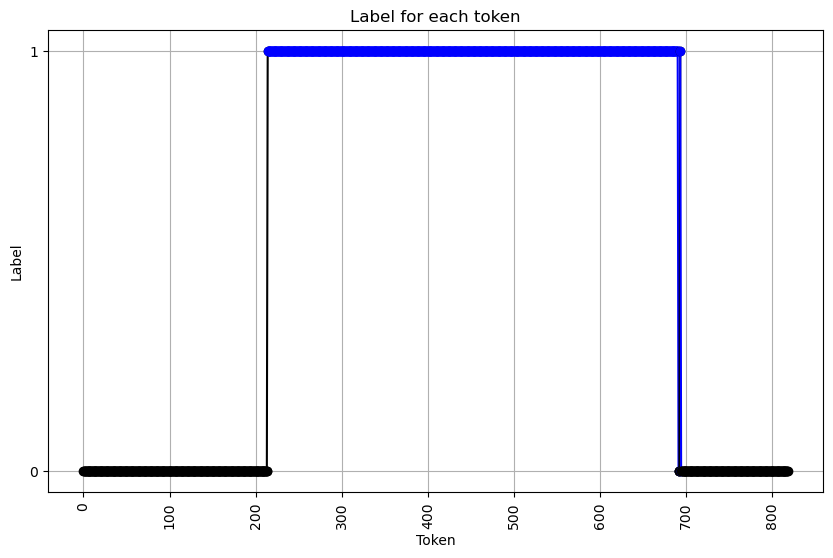

In [53]:
import matplotlib.pyplot as plt
import numpy as np

tokens = np.array(tokens)  # convert your list to numpy array for convenience

# create your plot
plt.figure(figsize=(10,6))

# plot data
for i in range(len(tokens) - 1):
    if tokens[i] == 0:
        color = 'black'
    elif tokens[i] == 1:
        color = 'blue'
    else:
        color = 'red'
        #tokens[i] == 1
    plt.plot([i, i+1], [tokens[i], tokens[i+1]], color=color, marker='o')

plt.xlabel('Token')
plt.ylabel('Label')
plt.title('Label for each token')
plt.xticks(rotation='vertical')
plt.yticks(np.arange(2), ['0', '1'])  
plt.grid(True)
plt.show()

***
# Test on Bea's phages :

In [ ]:
import os 
import pandas
import torch
from Bio import SeqIO
from collections import Counter
from transformers import AutoModelForTokenClassification, AutoTokenizer

path_work = "/home/conchae/PhageDepo_pdb"
path_fasta = f"{path_work}/Bea_phages_no_Dpo"
path_bea_out = f"{path_fasta}/model_outputs"
model_path = f"{path_work}/script_files/esm2_t12_35M_UR50D-finetuned-depolymerase/checkpoint-198/"


tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForTokenClassification.from_pretrained(model_path)


def make_prediction(fasta_txt) :
    if len(fasta_txt) > 200 :
        input_ids = tokenizer.encode(input_text, return_tensors='pt')
        outputs = model(input_ids)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        labels = model.config.id2label
        tokens = []
        for token_id, token_probs in zip(input_ids[0], probs[0]):
            top_label_id = token_probs.argmax().item()
            tokens.append(labels[top_label_id].split("_")[1])
        return tokens
        
for multifasta in os.listdir(path_fasta) :
    if multifasta[-5:] == "fasta" :
        fastas = SeqIO.parse(f"{path_fasta}/{multifasta}" , "fasta")
        for record in fastas :
            locus_tag = record.description.split("locus_tag=")[1].split("]")[0]
            annotation = "_".join(record.description.split("protein=")[1].split("]")[0].split())
            sequence = record.seq
            results = make_prediction(sequence)
            if "1" in dict(Counter(tokens)) :
                n_depo = dict(Counter(tokens))["1"]
            elif "2" in dict(Counter(tokens)) :
                n_depo = dict(Counter(tokens))["1"]
            else : 
                n_depo = 0
            with open(f"{path_bea_out}/{locus_tag}.{annotation}__{n_depo}.out" , "w") as outfile :
                outfile.write(str(results))
            
# ************************************************************* 
#!/bin/bash
#BATCH --job-name=bea_pred
#SBATCH --qos=short 
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=10
#SBATCH --mem=100gb 
#SBATCH --time=1-00:00:00 
#SBATCH --output=bea_pred%j.log 

source /storage/apps/ANACONDA/anaconda3/etc/profile.d/conda.sh
conda activate embeddings

python /home/conchae/PhageDepo_pdb/script_files/beas_phages.py

***
# Bea's data insights : 
#### Add more sequences for 6 bladed-beta propeller ==> That was the missing fold in Bea's searching.
#### Need to add negative data.
#### The annotations : terminase large subunit , helicase , DNA , polymerase , RNaseH , methyltransferase